In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


we have 1000 rows and 40 columns in data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we have 19 numerical and 21 object columns

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We have all rows null in _c39 column so dropping it

In [6]:
#dropping _c39 columns
df.drop('_c39',axis=1,inplace=True)

In [7]:
df.shape

(1000, 39)

In [8]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

28-04-1992    3
01-01-2006    3
05-08-1992    3
28-12-1991    2
03-02-1997    2
             ..
11-11-1994    1
24-06-1998    1
10-09-2002    1
26-08-2000    1
24-06-2003    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [9]:
# replacing '?' with No info
df=df.replace('?','No Info')

some of the rows are having ? sign replacing them with No info

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [11]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

we can see there is one row in negative value must be the mistake or not sure droping the row

In [12]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,29-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [13]:
# droping this value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [14]:
# dividing ['incident_date] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [15]:
# in incident data all the incident is from 2015 so dropping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

In [16]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# dropping policy_bind_date  column
df.drop('policy_bind_date',axis=1,inplace=True)

In [17]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [18]:
# dropping the policy_number  and  other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [19]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [20]:
df.shape

(999, 40)

In [21]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

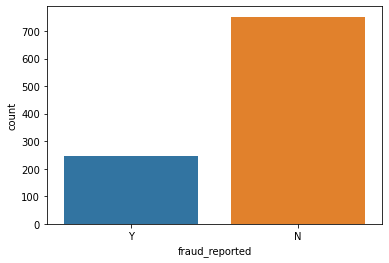

In [22]:
sns.countplot(df['fraud_reported'])

we can notice data is imbalance we have to deal with

## EDA

In [23]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


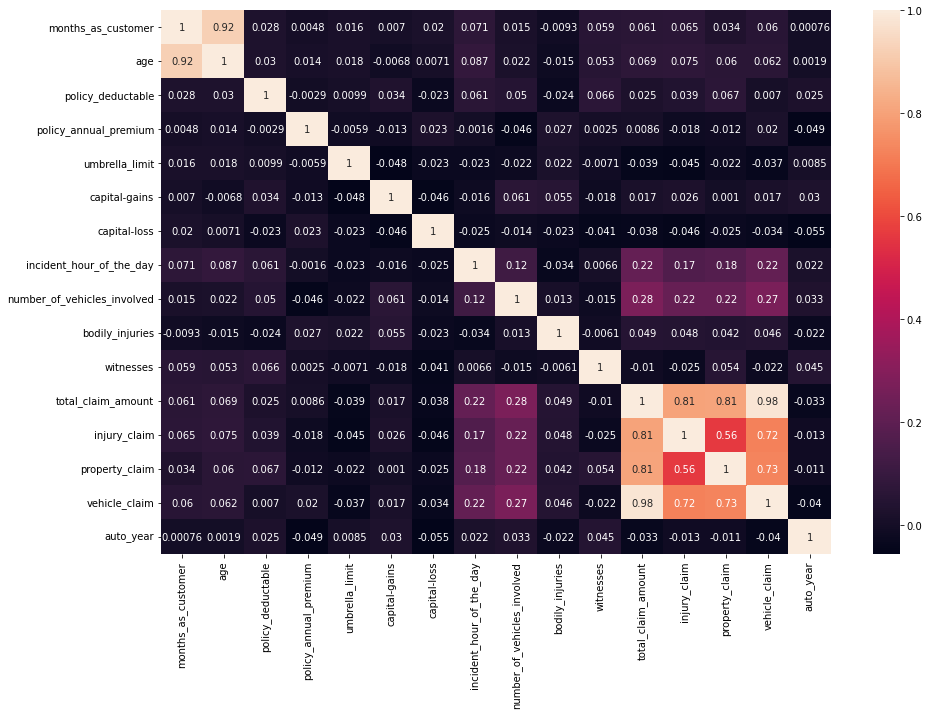

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

We can notice total_claim-amount, injury_claim, property_claim and vehicle_claim are highly correlated with each other,
All other are very least correlated with each other

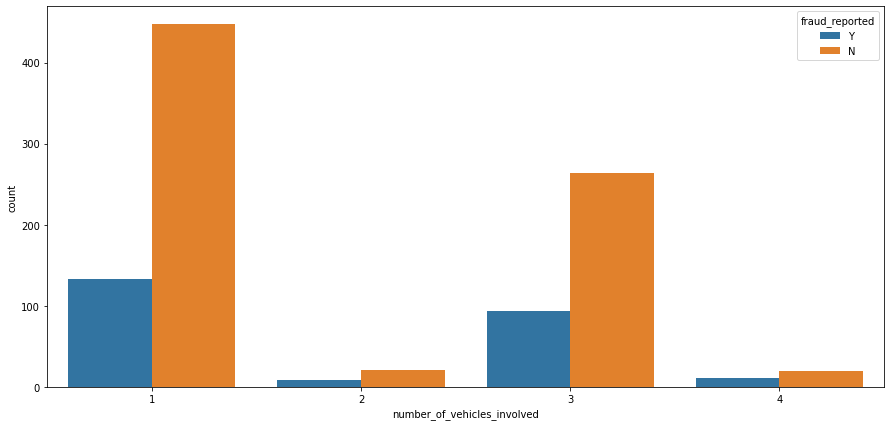

In [26]:
plt.figure(figsize=(15, 7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

most of fraud report were found where number_of_vehicles_involved more than 1

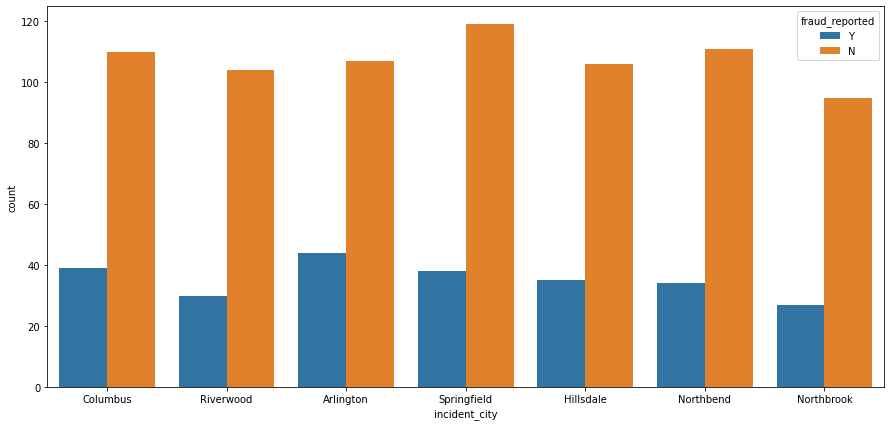

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

In all cities fraud reported count are almost same

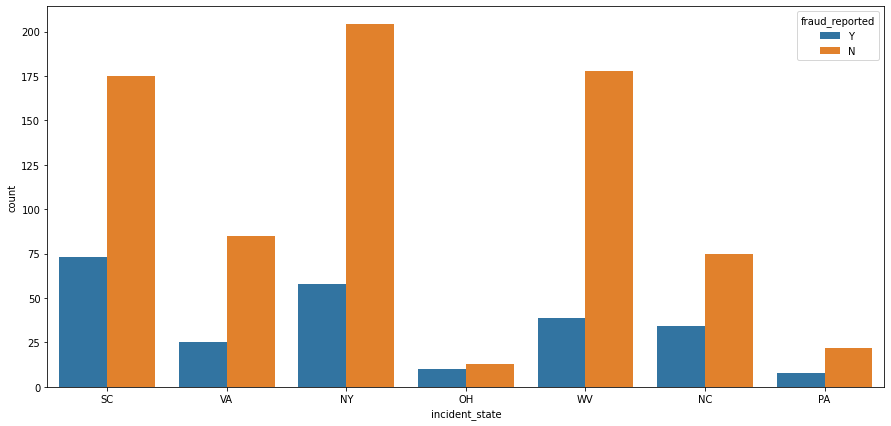

In [28]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

Most of fraud reported were found where incident state was SC, NY, OH, NC AND PA

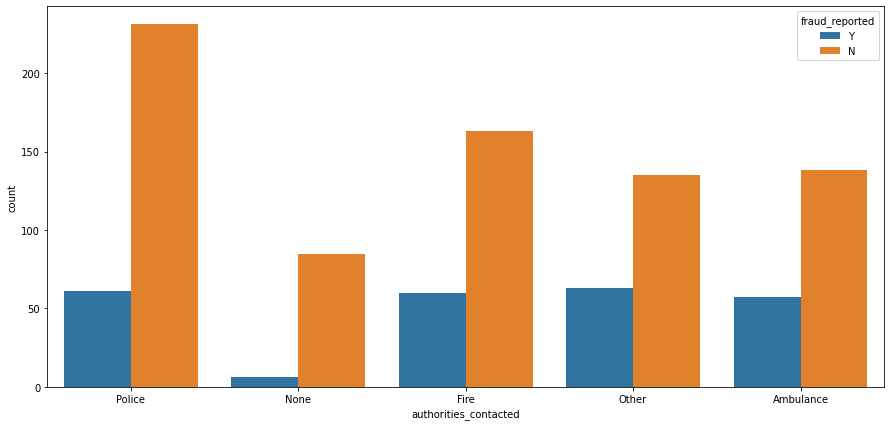

In [29]:
plt.figure(figsize=(15, 7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

most of fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance

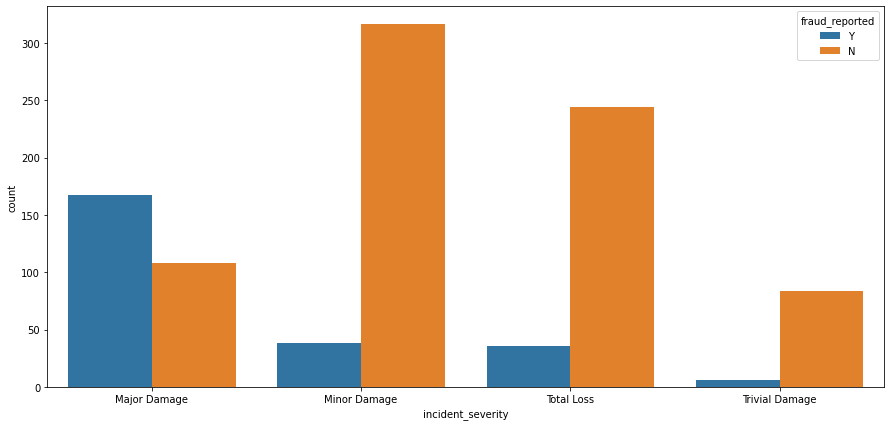

In [30]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

Most of fraud reported claim are Major Damage, most of them are counted as Fraud,
there are very fraud report in Trivial damage

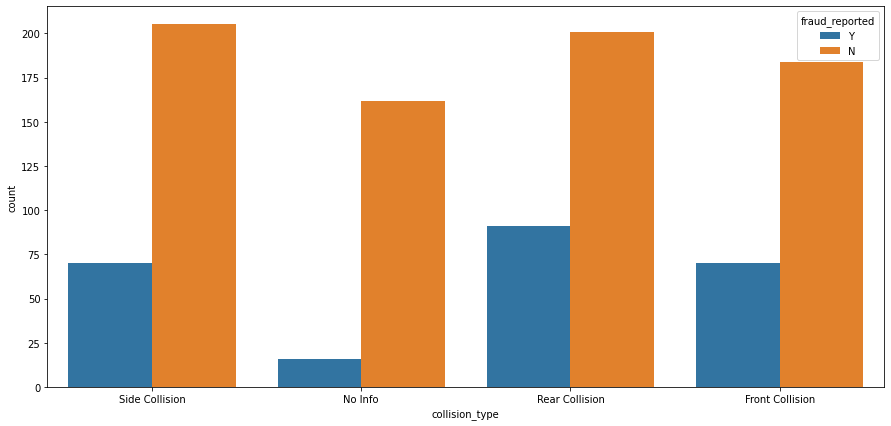

In [31]:
plt.figure(figsize=(15, 7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

most of fraud reported claims in Side Collision, Rear Collision and Front Collision,
some of reported claim we have those are in no info of collision type

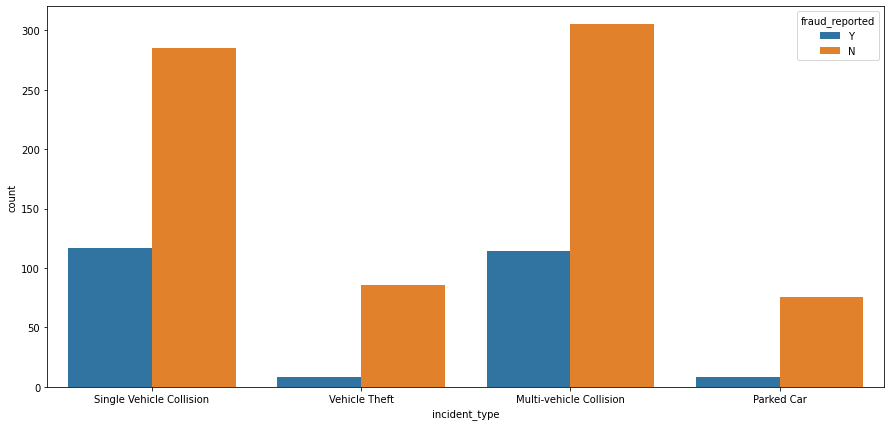

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

we have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type.
In other two incident type vehicle theft and parked car are very less fraud report

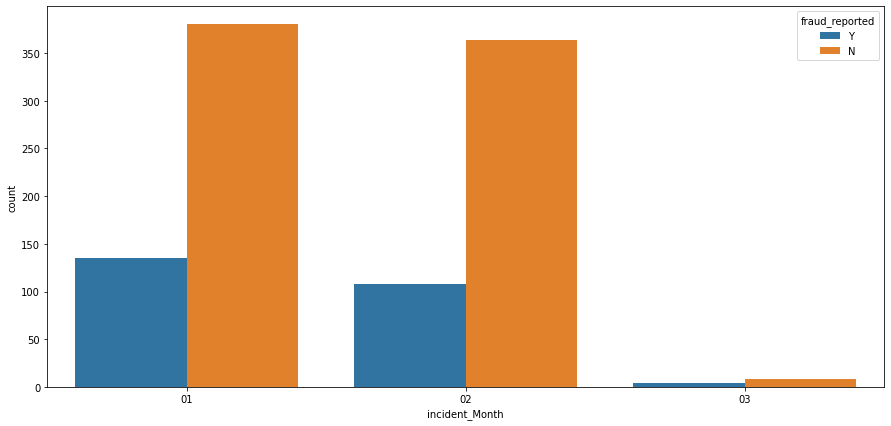

In [33]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

most of the data we have reported in month 1 and 2 fraud reported are also around same in both months

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

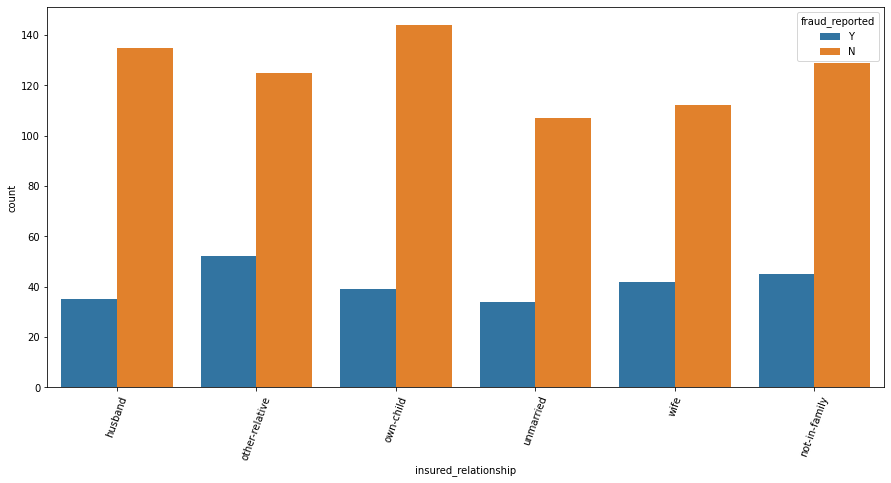

In [34]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

according the data info, cx those having insured relationship with other relative and wife are most reported than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

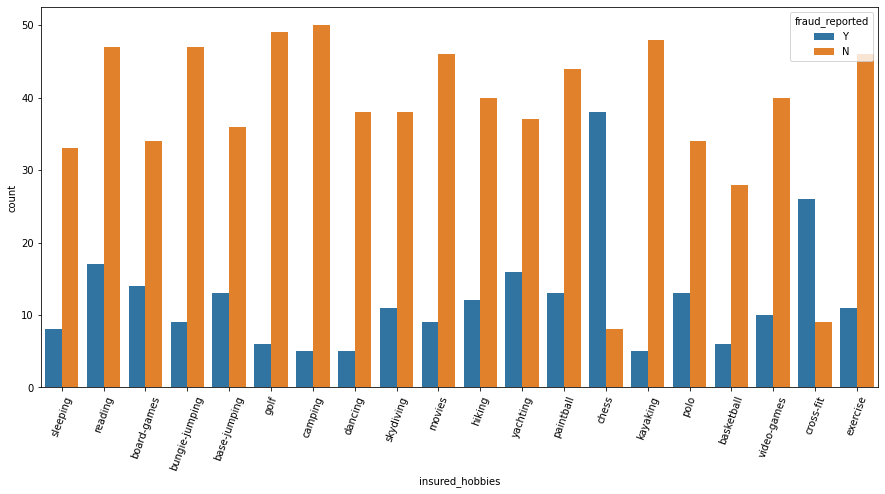

In [35]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

Here we can see the cx those hobbies are Chess, are most fraud reported cx

Here we can see the cx those hobbies are cross-fit, are also most fraud reported cx

after that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others

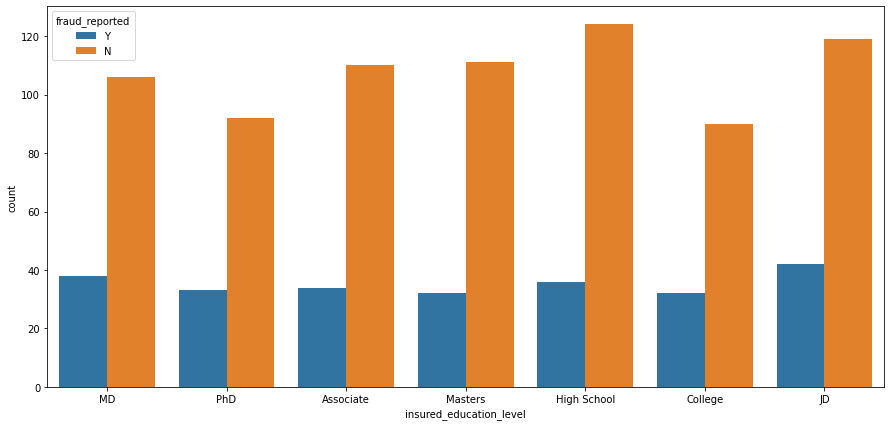

In [39]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

we higher cx those are education level is High School and least cx in PhD ad College

there is very little diffrence in fraud report in all kind of cx

fraued report is little higher in cx those education level is JD, MD, PhD, and College than others

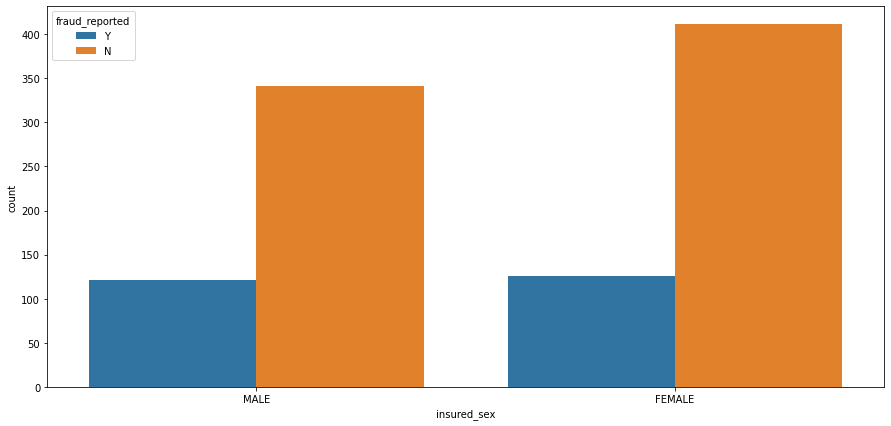

In [40]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

we have more cx in Female than the Male.
but fraud reported is little high Male cx

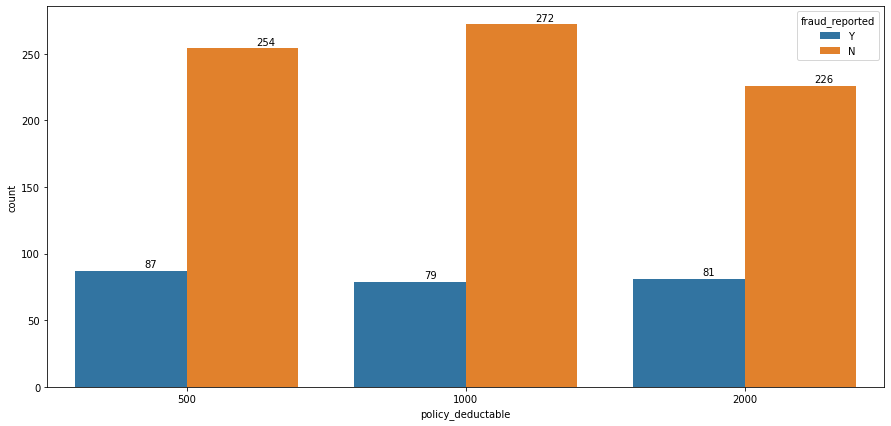

In [43]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data= df )
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Here we notice here according to count fraud report high in cx of 2000 policy_deductable

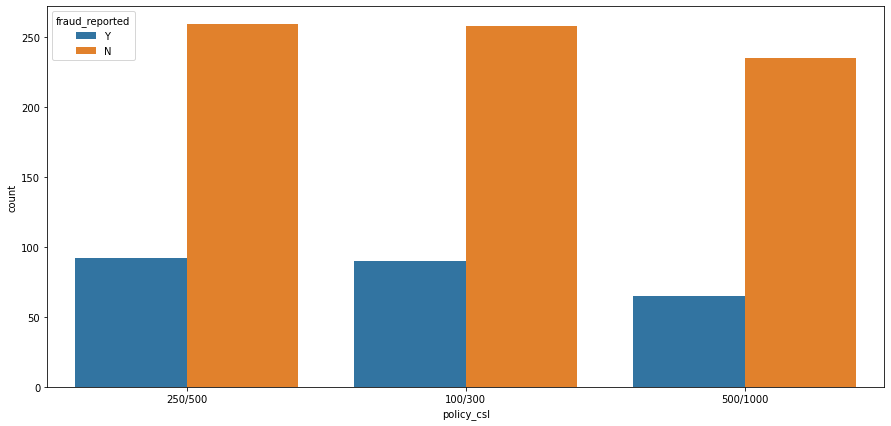

In [44]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_csl',hue='fraud_reported',data= df )

In all three csl we same kind of similarty fraud report is also common in all policy_csl

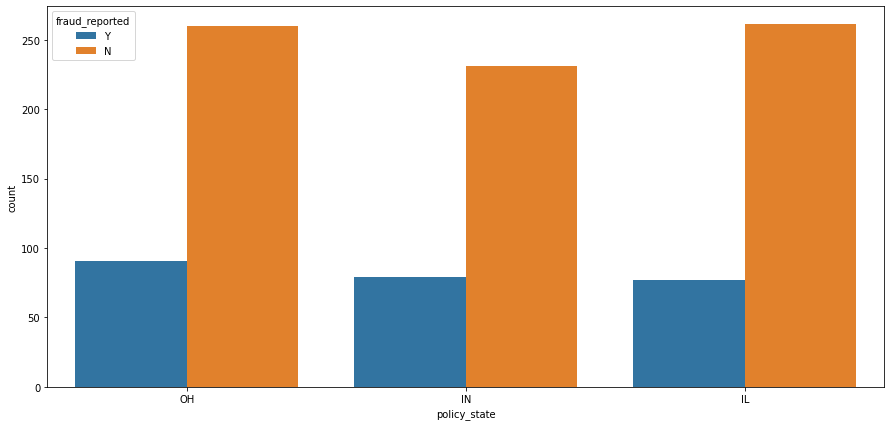

In [45]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_state',hue='fraud_reported',data= df )

we have cx from three states and fraud report almost common in all three states

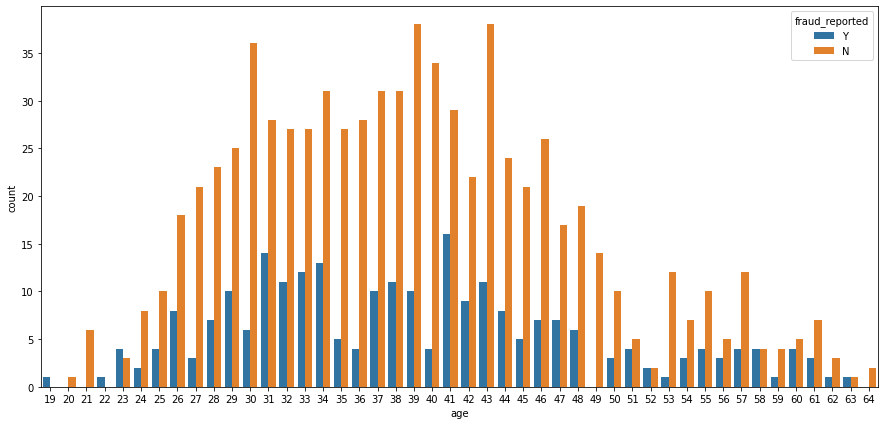

In [46]:
plt.figure(figsize=(15, 7))
sns.countplot(x='age',hue='fraud_reported',data= df )

We see most the cx are age of 26 to 50.
fraud report is higher in cx 26 to 50 of age

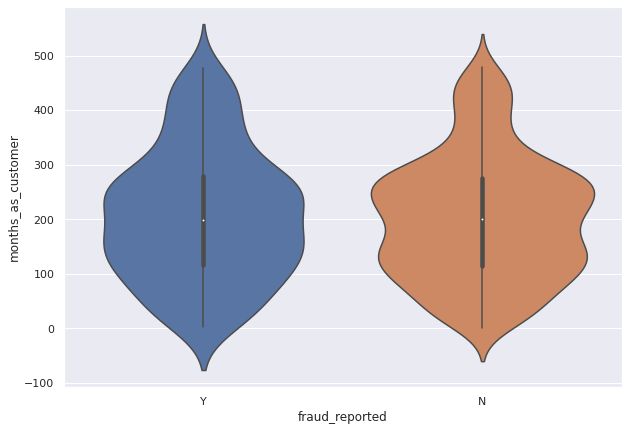

In [47]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= df )

most of the cx are 100 to 300 months old,
We can notice here fraud report is high in cx between 100 to 250 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

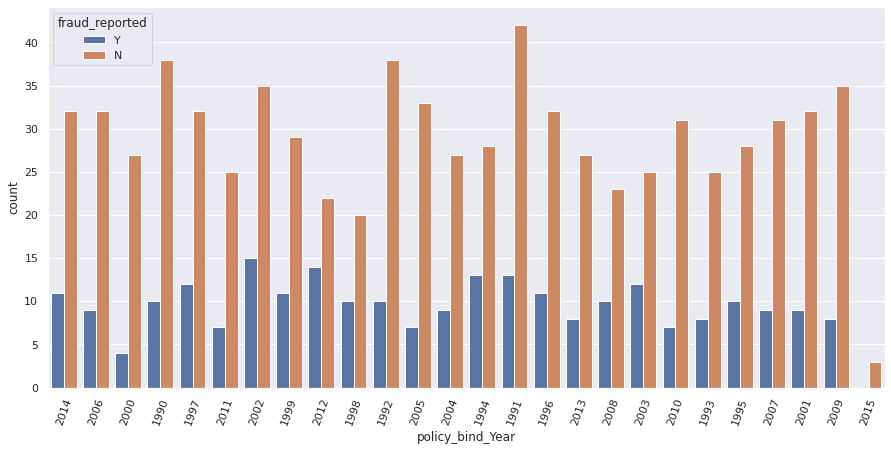

In [48]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

here we notice fraud report is high in policy_bind_year of 2014,2006,1990,1997,2002,1999,2012, 1998,1994,2008,2003 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

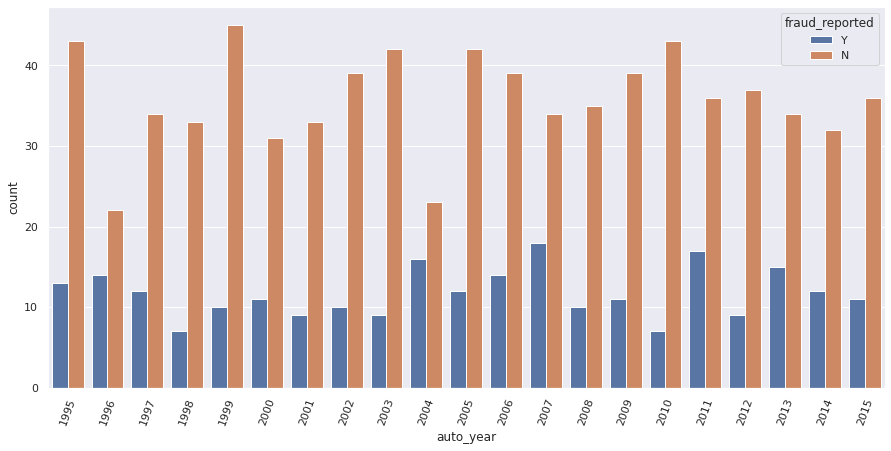

In [49]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

we can notice we have less vehicle from 1996 and 2004 auto year,
according to vehice count fraud reported is higher in vehicle of 1996, 2004 , 2007, 2011, 2013, 2014 and etc auto year than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

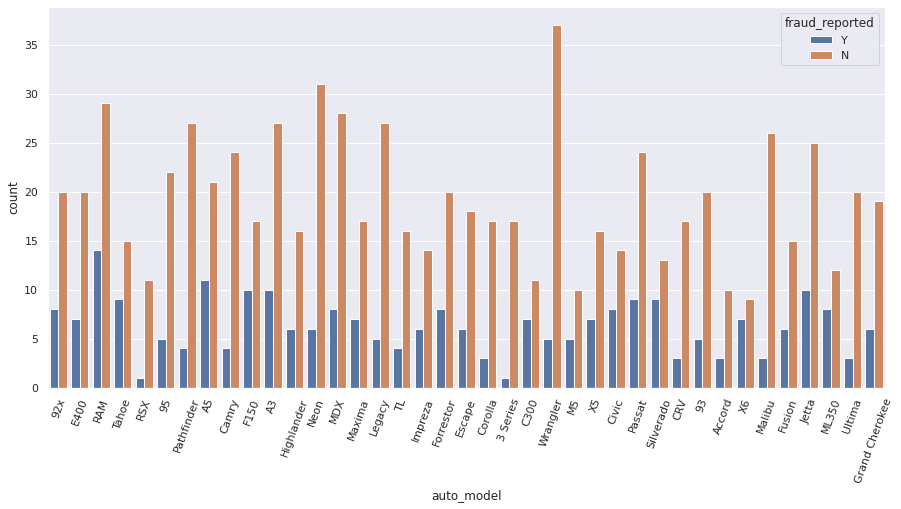

In [50]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

most of auto_model we see in Wrangler, RAM, Pathfinder, Neon and etc.
we can notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 AND ETC atuo_models

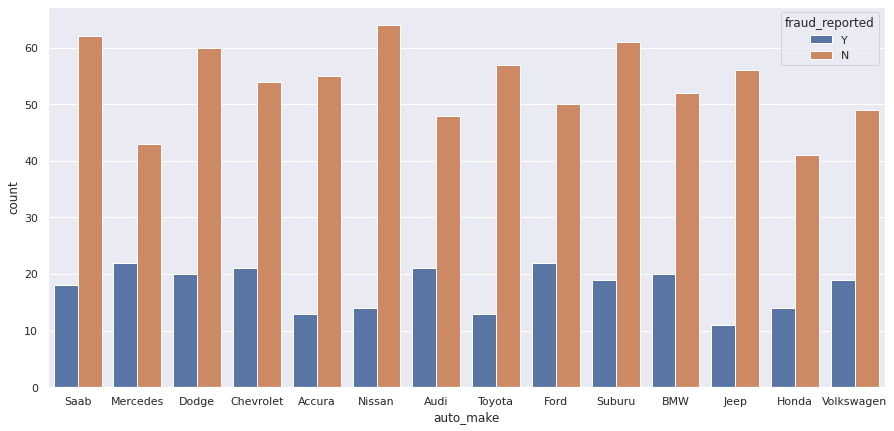

In [51]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make
In Other Auto_make brand is less than others

#### Have done the analysis of all important features, some of features don't have much information to define

## Skewness handling
### Skew and outliers will be handel in numerical numerical columns only

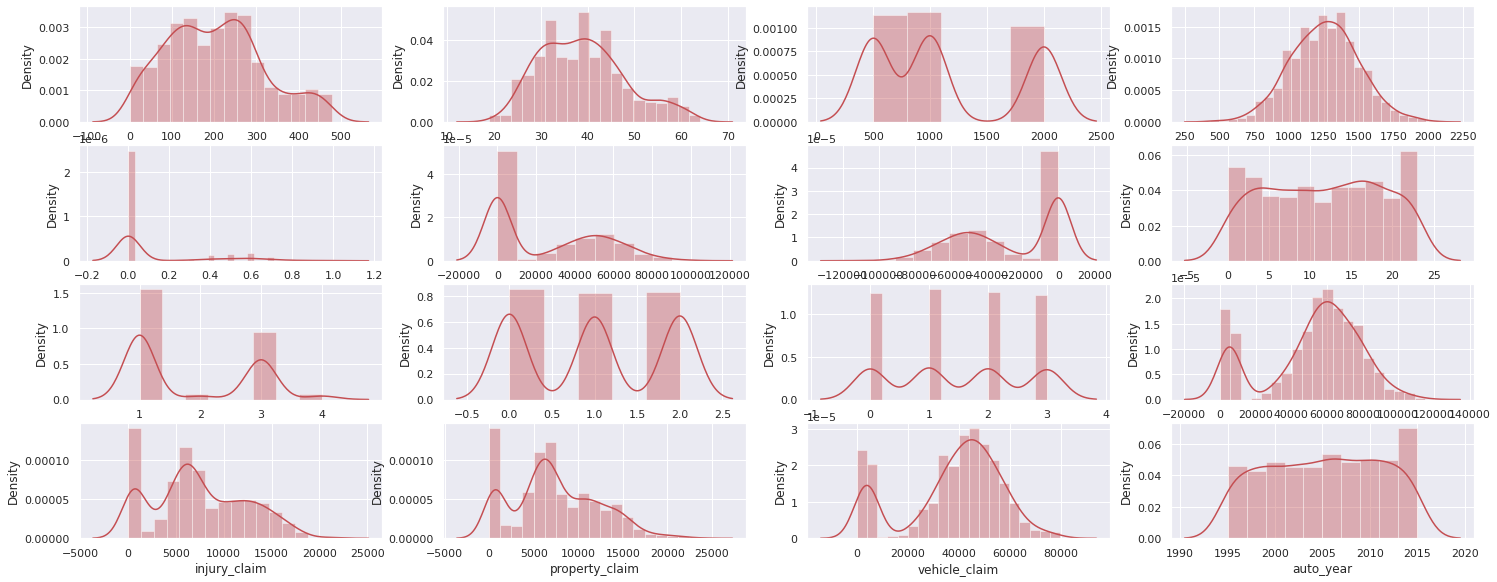

In [52]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [53]:
df.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

skewness more than+/- 0.5 will we treated

object and target variable columns will no be treated

we can see here most of the columns are skewed

will only deal with numercal columns
umbrella_limit,
total_claim_amount,
vehicle_claim

In [54]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

## Outliers Handling

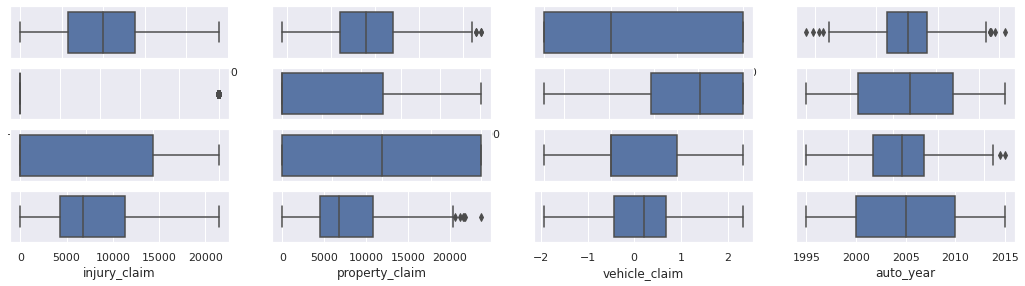

In [55]:
plt.figure(figsize=(18,10))
for o in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Only some of columns seems having outliers after skewness removed 

## outliers removal
### zscore

In [56]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806]), array([ 3,  3, 13,  3,  6]))


In [57]:
df1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (999, 40)
After removing outliers:: (994, 40)


Zscore removing all rows from data

### IQR

In [58]:
from scipy import stats 
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR

1230.8691969059628

In [59]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
dfout = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dfout.shape)

(313, 16)


#### choosing ZSCORE because there is huge dataloss in IQR

In [60]:
df=df1

## Using LabelEncoder for convering categorical to numerical`

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categdata = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categdata:
    df[val]=le.fit_transform(df[val].astype(str))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int64  
 3   policy_csl                   994 non-null    int64  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int64  
 8   insured_education_level      994 non-null    int64  
 9   insured_occupation           994 non-null    int64  
 10  insured_hobbies              994 non-null    int64  
 11  insured_relationship         994 non-null    int64  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

All columns are converted into numerical now

## Dividing data into X and Y

In [65]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [66]:
x.shape

(994, 39)

In [67]:
y.shape

(994,)

## scaling X values

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [69]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [70]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,0.512072,0.482093,0.249717,0.714591,0.498721,0.390677,0.529510,0.395708,0.542505,0.540744,0.495137,0.507567,0.280013,0.481891,0.496982,0.493628,0.485412,0.437963,0.345997,0.337963,0.452576,0.504179,0.508790,0.505785,0.467270,0.248994,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,0.299356,0.336233,0.277252,0.298844,0.291555,0.360830,0.380619,0.313651,0.382973,0.359714,0.340398,0.302092,0.339745,0.400370,0.409469,0.370100,0.405201,0.227219,0.227594,0.219722,0.235036,0.310061,0.293301,0.300326,0.288265,0.261924,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,0.263158,0.200000,0.000000,0.451122,0.254237,0.000000,0.000000,0.000000,0.250000,0.166667,0.166667,0.260870,0.000000,0.000000,0.000000,0.083333,0.000000,0.336733,0.199767,0.203347,0.349015,0.230769,0.263158,0.250000,0.233333,0.000000,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,0.526316,0.400000,0.000000,0.751603,0.508475,0.333333,0.666667,0.333333,0.500000,0.666667,0.500000,0.521739,0.000000,0.500000,0.500000,0.333333,0.500000,0.478748,0.315152,0.308803,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,0.789474,0.800000,0.507463,1.000000,0.745763,0.666667,1.000000,0.666667,1.000000,0.833333,0.833333,0.739130,0.666667,1.000000,1.000000,0.666667,1.000000,0.591345,0.525175,0.497707,0.612979,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### data have been scalled
## Imbalanced learn

Using OverSamling_BorderlineSMOTE


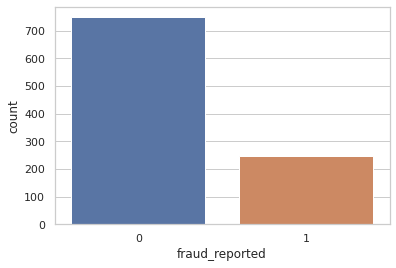

In [71]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [72]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (994,)
Resample Target dataset shape (1496,)


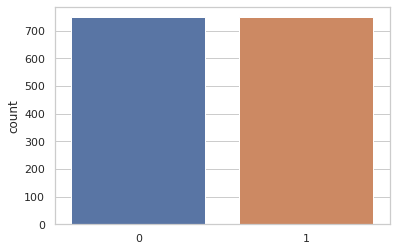

In [73]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balaced data for model training

## Spliting Train and Test data

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [76]:
x_train.shape

(1092, 39)

In [77]:
x_test.shape

(404, 39)

In [78]:
y_train.shape

(1092,)

In [79]:
y_test.shape

(404,)

## MODEL BUILDING:

In [80]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

### KNeighborsClassifier

In [85]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6624548494983278


In [86]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6608910891089109
[[ 62 124]
 [ 13 205]]
              precision    recall  f1-score   support

           0       0.83      0.33      0.48       186
           1       0.62      0.94      0.75       218

    accuracy                           0.66       404
   macro avg       0.72      0.64      0.61       404
weighted avg       0.72      0.66      0.62       404

Training accuracy:: 0.7216117216117216
Test accuracy:: 0.6608910891089109


### DECISION TREE CLASSIFIER

In [83]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8369676700111481


In [84]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8242574257425742
[[148  38]
 [ 33 185]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       186
           1       0.83      0.85      0.84       218

    accuracy                           0.82       404
   macro avg       0.82      0.82      0.82       404
weighted avg       0.82      0.82      0.82       404

Training accuracy:: 1.0
Test accuracy:: 0.8242574257425742


### RandomForestClassifier

In [87]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8730858416945374


In [88]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8613861386138614
[[159  27]
 [ 29 189]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.88      0.87      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.86      0.86       404
weighted avg       0.86      0.86      0.86       404

Training accuracy:: 1.0
Test accuracy:: 0.8613861386138614


### LogisticRegression

In [81]:
lr=LogisticRegression()
lr_score=cross_val_score(lr,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(lr_score))

cross validation score: 0.7633935340022296


In [82]:
lr.fit(x_train,y_train)
LR_predicted=lr.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7227722772277227
[[129  57]
 [ 55 163]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       186
           1       0.74      0.75      0.74       218

    accuracy                           0.72       404
   macro avg       0.72      0.72      0.72       404
weighted avg       0.72      0.72      0.72       404

Training accuracy:: 0.7921245421245421
Test accuracy:: 0.7227722772277227


## ENSEMBLE TECHNIQUES
### ADA BOOST CLASSIFIER

In [89]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8571409395973154


In [90]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8415841584158416
[[160  26]
 [ 38 180]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       186
           1       0.87      0.83      0.85       218

    accuracy                           0.84       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.84      0.84      0.84       404

Training accuracy:: 0.9111721611721612
Test accuracy:: 0.8415841584158416


### Gradient Boosting classifier

In [111]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8845100671140941


In [112]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8910891089108911
[[158  28]
 [ 16 202]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       186
           1       0.88      0.93      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404

Training accuracy:: 0.9789377289377289
Test accuracy:: 0.8910891089108911


GradientBoostingClassifier as final model

for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well

### BAGGING CLASSIFIER

In [91]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8704742729306488


In [92]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8663366336633663
[[161  25]
 [ 29 189]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       186
           1       0.88      0.87      0.88       218

    accuracy                           0.87       404
   macro avg       0.87      0.87      0.87       404
weighted avg       0.87      0.87      0.87       404

Training accuracy:: 0.9935897435897436
Test accuracy:: 0.8663366336633663


## HYPER PARAMETER TUNING: 
### GradientBoostingClassifier

In [95]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [96]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [97]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.7min finished


Accuracy after parameter tuning:: 0.8910891089108911


In [98]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 5}

#### model training with best parameters

In [99]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.5],
     'random_state':[5]   
}

In [100]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [101]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s finished


Accuracy after parameter tuning:: 0.8737623762376238


As we notice after HYPER PARAMETER TUNING models accuracy score got increased

## Report of GradientBoostingClassifier

In [102]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       186
           1       0.88      0.89      0.88       218

    accuracy                           0.87       404
   macro avg       0.87      0.87      0.87       404
weighted avg       0.87      0.87      0.87       404



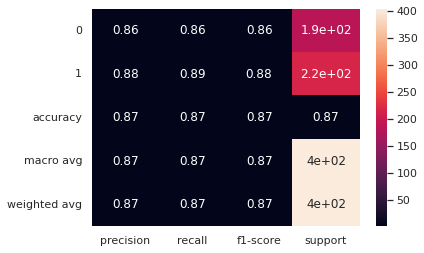

In [103]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.872768077340436


In [106]:
from sklearn.metrics import roc_curve

In [107]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

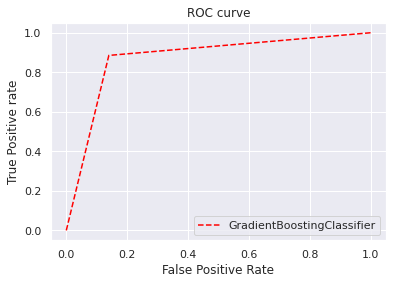

In [108]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Saving Model:

In [109]:
import joblib

In [110]:
joblib.dump(best_adb_grid.best_estimator_,'Insurance Claims- Fraud Detection.obj')

['Insurance Claims- Fraud Detection.obj']